In [ ]:
!pip install tensorflow

In [460]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Add, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [558]:
df1 = pd.read_csv('/content/Electricity_load_forecasting.csv')

In [559]:
df1.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [560]:
df1 = df1.drop(columns = ['Holiday_ID'])

In [562]:
rolling_window = df1['nat_demand'].rolling(window=700, min_periods = 1)
df1['nat_demand_ma'] = rolling_window.mean()

In [563]:
df1['nat_demand_lag'] = df1['nat_demand'].shift(1)

In [564]:
df1

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,holiday,school,nat_demand_ma,nat_demand_lag
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,970.345000,NaN
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,941.260250,970.3450
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,927.596433,912.1755
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,918.185775,900.2688
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,913.285920,889.9538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43770,31-12-2019 19:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,1,0,1294.093850,1287.3592
43771,31-12-2019 20:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,1,0,1293.735555,1301.6065
43772,31-12-2019 21:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,1,0,1293.436726,1250.9634
43773,31-12-2019 22:00,1130.4575,26.166895,0.017965,0.018486,13.420656,24.112207,0.017393,0.020386,3.872397,22.862207,0.016401,0.055557,3.843736,1,0,1293.002435,1193.6802


In [565]:
df1.shape

(43775, 18)

In [566]:
df1 = df1.set_index('datetime')

In [567]:
df1 = df1.dropna()

In [568]:
x = df1.drop(columns = ['nat_demand'])
y = df1['nat_demand']

In [569]:
x_train, y_train = x.iloc[:35020], y.iloc[:35020]
x_test, y_test = x.iloc[35020:], y.iloc[35020:]

In [570]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train.iloc[:,:] = scaler.fit_transform(x_train)
x_test.iloc[:,:] = scaler.transform(x_test)

<ipython-input-570-cf368fa7a3a1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-570-cf368fa7a3a1>:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-570-cf368fa7a3a1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-570-cf368fa7a3a1>:4: Dep

In [571]:
# x_train = x_train.set_index('datetime')
# x_test = x_test.set_index('datetime')

In [572]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg.score(x_test, y_test)

0.9189459077256189

In [575]:
poly_features = PolynomialFeatures(degree = 3)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [576]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_poly = lr.predict(x_test)

In [577]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('RMSE:',rmse,'\nMAE:',mae,'\nMSE:',mse,'\nR2Score:',r2)

RMSE: 53.82807302495425 
MAE: 41.889898948094114 
MSE: 2897.4614455798073 
R2Score: 0.9189459077256189


In [578]:
input_dim = x_train.shape[1]
model = Sequential()
model.add(Dense(32, input_dim = input_dim, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_absolute_error', optimizer=Adam())

In [579]:
history = model.fit(x_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
876/876 [==============================] - 4s 3ms/step - loss: 1101.5630 - val_loss: 939.3818
Epoch 2/25
876/876 [==============================] - 3s 3ms/step - loss: 554.0493 - val_loss: 639.8106
Epoch 3/25
876/876 [==============================] - 3s 3ms/step - loss: 112.6485 - val_loss: 68.8822
Epoch 4/25
876/876 [==============================] - 2s 2ms/step - loss: 55.3618 - val_loss: 72.8079
Epoch 5/25
876/876 [==============================] - 2s 2ms/step - loss: 52.1069 - val_loss: 46.6701
Epoch 6/25
876/876 [==============================] - 2s 2ms/step - loss: 51.7745 - val_loss: 60.4432
Epoch 7/25
876/876 [==============================] - 2s 2ms/step - loss: 51.3518 - val_loss: 81.4050
Epoch 8/25
876/876 [==============================] - 3s 3ms/step - loss: 50.3532 - val_loss: 44.0309
Epoch 9/25
876/876 [==============================] - 2s 3ms/step - loss: 50.8092 - val_loss: 47.0148
Epoch 10/25
876/876 [==============================] - 2s 2ms/step - loss: 4

In [580]:
y_pred = model.predict(x_test)

274/274 [==============================] - 0s 2ms/step


In [581]:
r2_score(y_pred, y_test)

0.903817133291283

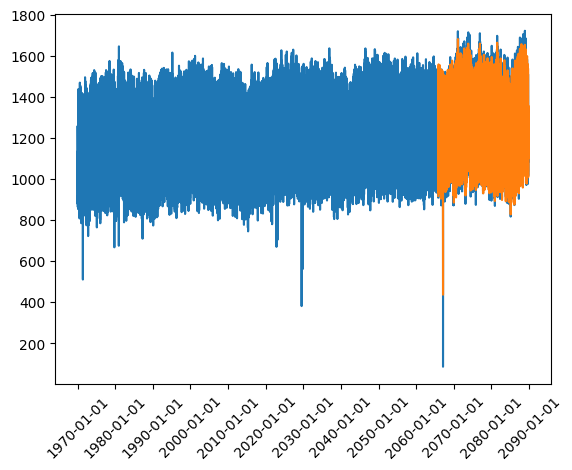

In [585]:
plt.plot(df1.index, df1['nat_demand'])
plt.plot(x_test.index, y_pred)
locator = mdates.YearLocator(base=10)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

In [173]:
df2 = pd.read_csv('/content/monthly_ocean_csv.csv')

In [174]:
df2.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [175]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [176]:
df_new = df2.pivot(index = 'Date', columns = 'Source', values = 'Mean').reset_index()

In [177]:
df_new

Source,Date,GCAG,GISTEMP
0,1880-01-06,0.0009,-0.30
1,1880-02-06,-0.1229,-0.21
2,1880-03-06,-0.1357,-0.18
3,1880-04-06,-0.0499,-0.27
4,1880-05-06,-0.0738,-0.14
...,...,...,...
1639,2016-08-06,0.8998,0.98
1640,2016-09-06,0.8767,0.87
1641,2016-10-06,0.7292,0.89
1642,2016-11-06,0.7504,0.93


In [178]:
rolling_window_gcag = df_new['GCAG'].rolling(window=3, min_periods = 1)
df_new['GCAG_ma'] = rolling_window_gcag.mean()
rolling_window_gistemp = df_new['GISTEMP'].rolling(window=3, min_periods = 1)
df_new['GISTEMP_ma'] = rolling_window_gistemp.mean()

In [180]:
df_new

Source,Date,GCAG,GISTEMP,GCAG_ma,GISTEMP_ma
0,1880-01-06,0.0009,-0.30,0.000900,-0.300000
1,1880-02-06,-0.1229,-0.21,-0.061000,-0.255000
2,1880-03-06,-0.1357,-0.18,-0.085900,-0.230000
3,1880-04-06,-0.0499,-0.27,-0.102833,-0.220000
4,1880-05-06,-0.0738,-0.14,-0.086467,-0.196667
...,...,...,...,...,...
1639,2016-08-06,0.8998,0.98,0.889700,0.856667
1640,2016-09-06,0.8767,0.87,0.881733,0.893333
1641,2016-10-06,0.7292,0.89,0.835233,0.913333
1642,2016-11-06,0.7504,0.93,0.785433,0.896667


In [187]:
import plotly.express as pex
pex.line(df2, 'Date', 'Mean', color = 'Source')

In [188]:
x_train_gcag, x_test_gcag = df_new[['Date','GCAG_ma']][:1316], df_new[['Date','GCAG_ma']][1316:]
y_train_gcag, y_test_gcag = df_new['GCAG'][:1316], df_new['GCAG'][1316:]

In [189]:
x_train_gistemp, x_test_gistemp = df_new[['Date','GISTEMP_ma']][:1316], df_new[['Date','GISTEMP_ma']][1316:]
y_train_gistemp, y_test_gistemp = df_new['GISTEMP'][:1316], df_new['GISTEMP'][1316:]

In [190]:
x_train_gcag = x_train_gcag.set_index('Date')
x_test_gcag = x_test_gcag.set_index('Date')
x_train_gistemp = x_train_gistemp.set_index('Date')
x_test_gistemp = x_test_gistemp.set_index('Date')

In [191]:
reg = LinearRegression().fit(x_train_gcag, y_train_gcag)
y_pred_gcag = reg.predict(x_test_gcag)
reg.score(x_test_gcag, y_test_gcag)

0.8820970038139428

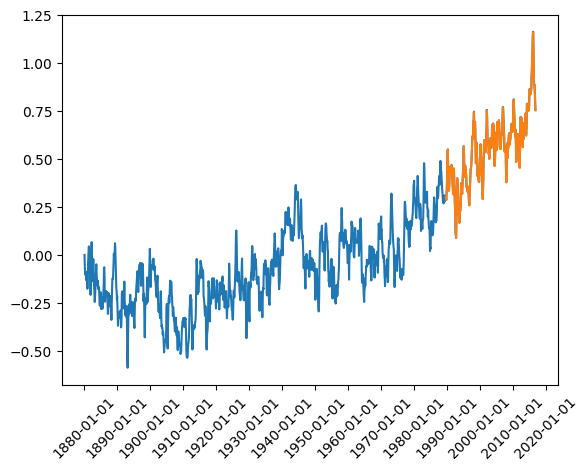

In [193]:
plt.plot(df_new['Date'], df_new['GCAG_ma'])
plt.plot(x_test_gcag.index, y_pred_gcag)
locator = mdates.YearLocator(base=10)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

In [194]:
poly_features = PolynomialFeatures(degree = 3)
x_train_poly_gcag = poly_features.fit_transform(x_train_gcag)
x_test_poly_gcag = poly_features.transform(x_test_gcag)

In [195]:
lr = LinearRegression()
lr.fit(x_train_poly_gcag, y_train_gcag)
y_pred_poly_gcag = lr.predict(x_test_poly_gcag)

In [196]:
rmse = np.sqrt(mean_squared_error(y_test_gcag, y_pred_gcag))
mae = mean_absolute_error(y_test_gcag, y_pred_gcag)
mse = mean_squared_error(y_test_gcag, y_pred_gcag)
r2 = r2_score(y_test_gcag, y_pred_gcag)
print('RMSE:',rmse,'\nMAE:',mae,'\nMSE:',mse,'\nR2Score:',r2)

RMSE: 0.06502985359750539 
MAE: 0.04930441194222156 
MSE: 0.004228881858912985 
R2Score: 0.8820970038139428


In [198]:
reg = LinearRegression().fit(x_train_gistemp, y_train_gistemp)
y_pred_gistemp = reg.predict(x_test_gistemp)
reg.score(x_test_gistemp, y_test_gistemp)

0.8564499259711469

In [199]:
rmse = np.sqrt(mean_squared_error(y_test_gistemp, y_pred_gistemp))
mae = mean_absolute_error(y_test_gistemp, y_pred_gistemp)
mse = mean_squared_error(y_test_gistemp, y_pred_gistemp)
r2 = r2_score(y_test_gistemp, y_pred_gistemp)
print('RMSE:',rmse,'\nMAE:',mae,'\nMSE:',mse,'\nR2Score:',r2)

RMSE: 0.0779001656490333 
MAE: 0.06198747155914974 
MSE: 0.0060684358081468295 
R2Score: 0.8564499259711469


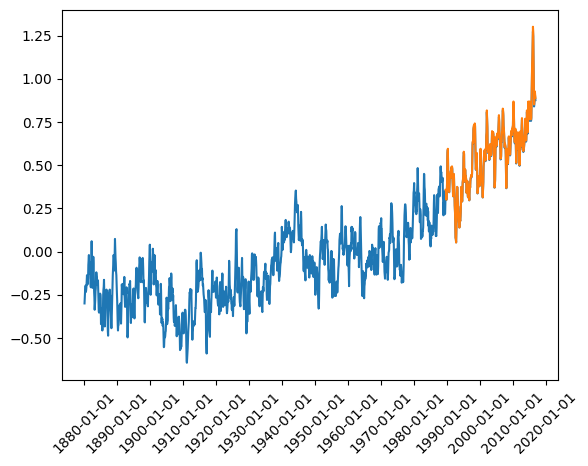

In [289]:
plt.plot(df_new['Date'], df_new['GISTEMP_ma'])
plt.plot(x_test_gistemp.index, y_pred_gistemp)
locator = mdates.YearLocator(base=10)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

In [201]:
poly_features = PolynomialFeatures(degree = 2)
x_train_poly_gistemp = poly_features.fit_transform(x_train_gistemp)
x_test_poly_gistemp = poly_features.transform(x_test_gistemp)
lr = LinearRegression()
lr.fit(x_train_poly_gistemp, y_train_gistemp)
y_pred_gistemp = lr.predict(x_test_poly_gistemp)

In [202]:
rmse = np.sqrt(mean_squared_error(y_test_gistemp, y_pred_gistemp))
mae = mean_absolute_error(y_test_gistemp, y_pred_gistemp)
mse = mean_squared_error(y_test_gistemp, y_pred_gistemp)
r2 = r2_score(y_test_gistemp, y_pred_gistemp)
print('RMSE:',rmse,'\nMAE:',mae,'\nMSE:',mse,'\nR2Score:',r2)

RMSE: 0.07807362016513548 
MAE: 0.061945237238699796 
MSE: 0.006095490165689851 
R2Score: 0.8558099496822175


In [258]:
input_dim = x_train_gcag.shape[1]
model = Sequential()
model.add(Dense(16, input_dim = input_dim, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
# model.add(Dense(8, activation = 'relu'))
# model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer=Adam())

In [280]:
history_gcag = model.fit(x_train_gcag, y_train_gcag, epochs = 10, validation_split = 0.2)

Epoch 1/10
33/33 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0037
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0036
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0035
Epoch 7/10
33/33 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0036
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0035
Epoch 10/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0035


In [281]:
y_pred = model.predict(x_test_gcag)

11/11 [==============================] - 0s 2ms/step


In [282]:
from sklearn.metrics import r2_score
r2_score(y_test_gcag, y_pred)

0.7723474663158061

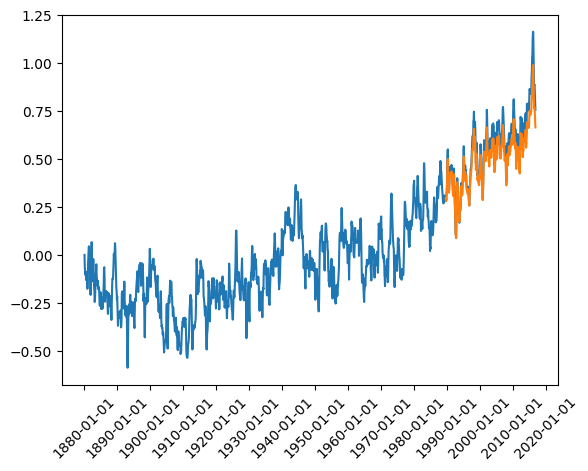

In [283]:
plt.plot(df_new['Date'], df_new['GCAG_ma'])
plt.plot(x_test_gcag.index, y_pred)
locator = mdates.YearLocator(base=10)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

In [284]:
rmse = np.sqrt(mean_squared_error(y_test_gcag, y_pred))
mae = mean_absolute_error(y_test_gcag, y_pred)
mse = mean_squared_error(y_test_gcag, y_pred)
r2 = r2_score(y_test_gcag, y_pred)
print('RMSE:',rmse,'\nMAE:',mae,'\nMSE:',mse,'\nR2Score:',r2)

RMSE: 0.09036215914335663 
MAE: 0.07178281953912682 
MSE: 0.00816531980504931 
R2Score: 0.7723474663158061


In [285]:
history_gcag = model.fit(x_train_gistemp, y_train_gistemp, epochs = 10, validation_split = 0.2)

Epoch 1/10
33/33 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 9/10
33/33 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 10/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0057


In [286]:
y_pred = model.predict(x_test_gistemp)

11/11 [==============================] - 0s 2ms/step


In [287]:
r2_score(y_test_gistemp, y_pred)

0.7888410518445744

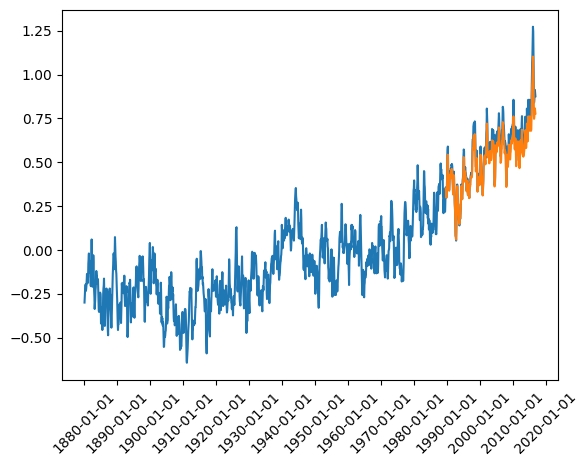

In [288]:
plt.plot(df_new['Date'], df_new['GISTEMP_ma'])
plt.plot(x_test_gistemp.index, y_pred)
locator = mdates.YearLocator(base=10)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()